# Question 3.1

In [219]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit



In [205]:
array = np.loadtxt("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset3/data/CO2Data_modified.csv", delimiter=',')
# # df['t'] = (df["Mn"] - 0.5) / 12 + df["Yr"] - 1958

# # df['Mn']
# print(df.head())
t_col = ((array[:, 1]-0.5)/12 + array[:, 0] - 1958).reshape(-1,1)

array = np.hstack((t_col, array))
array = array[:, [0, 1, 2, 5, 6]]

filtered_array = array[array[:, -2] != -99.99]

print(filtered_array)

[[2.08333333e-01 1.95800000e+03 3.00000000e+00 3.15690000e+02
  3.14420000e+02]
 [2.91666667e-01 1.95800000e+03 4.00000000e+00 3.17450000e+02
  3.15150000e+02]
 [3.75000000e-01 1.95800000e+03 5.00000000e+00 3.17500000e+02
  3.14740000e+02]
 ...
 [5.85416667e+01 2.01600000e+03 7.00000000e+00 4.04500000e+02
  4.03690000e+02]
 [5.86250000e+01 2.01600000e+03 8.00000000e+00 4.02240000e+02
  4.03780000e+02]
 [5.87083333e+01 2.01600000e+03 9.00000000e+00 4.01010000e+02
  4.04510000e+02]]


### Part(a)

In [206]:
model = LinearRegression()

x1 = (filtered_array[:, 0]).reshape(-1,1) #t

y = (filtered_array[:, -2]).reshape(-1,1)

model.fit(x1, y)

print(model.coef_)
print(model.intercept_)

y_pred1 = model.predict(x1)

residuals1 = y-y_pred1


[[1.5239544]]
[306.83060094]


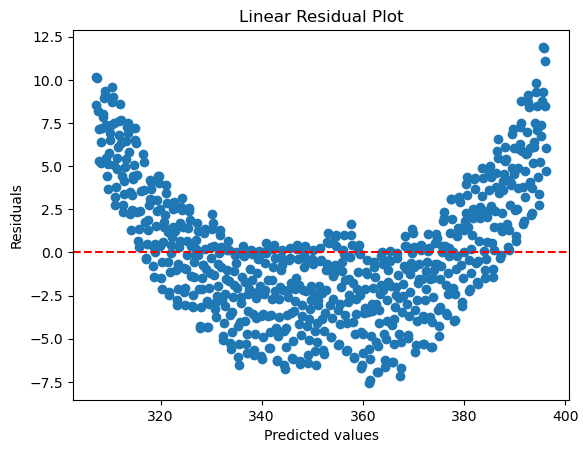

In [207]:
plt.scatter(y_pred1, residuals1)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linear Residual Plot")
plt.savefig("Linear Residual Plot")
plt.show()

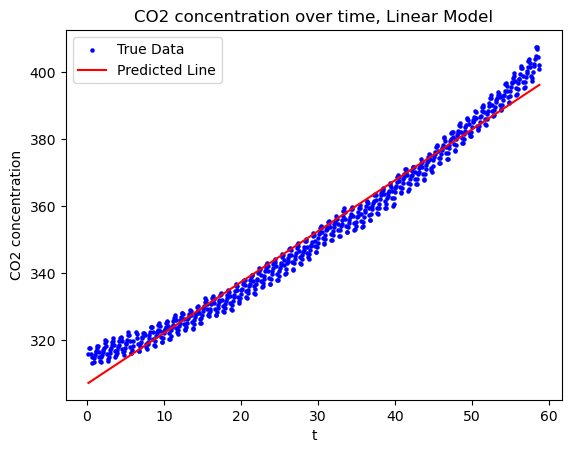

In [208]:
plt.scatter(x1, y, color='blue', label='True Data', s=5)

# Plot predicted values (regression line)
plt.plot(x1, y_pred1, color='red', label='Predicted Line')

# Labels and title
plt.xlabel('t')
plt.ylabel('CO2 concentration')
plt.title('CO2 concentration over time, Linear Model')
plt.savefig("Linear Plot")
plt.legend()
plt.show()

### Part(b)

In [209]:
t2 = (filtered_array[:, 0])**2
deg2_array = np.insert(filtered_array, 1, t2, axis=1)


In [210]:
model = LinearRegression()

x2 = deg2_array[:, [0,1]]

model.fit(x2, y)

print(model.coef_)
print(model.intercept_)

y_pred2 = model.predict(x2)

residuals2 = y-y_pred2

[[0.78335788 0.012517  ]]
[314.23913072]


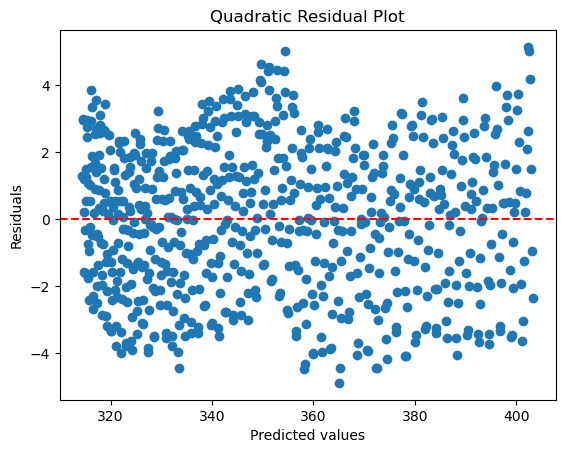

In [211]:
plt.scatter(y_pred2, residuals2)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Quadratic Residual Plot")
plt.savefig("Quadratic Residual Plot")
plt.show()

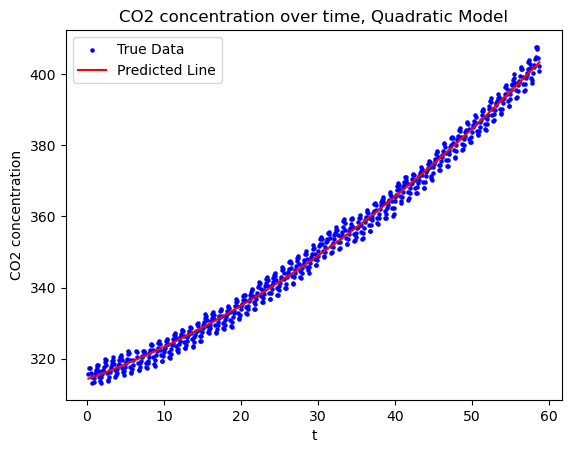

In [212]:
plt.scatter(x1, y, color='blue', label='True Data', s=5)

# Plot predicted values (regression line)
plt.plot(x1, y_pred2, color='red', label='Predicted Line')

# Labels and title
plt.xlabel('t')
plt.ylabel('CO2 concentration')
plt.title('CO2 concentration over time, Quadratic Model')
plt.savefig("Quadratic Plot")
plt.legend()
plt.show()

### Part (c)

In [213]:
t3 = (filtered_array[:, 0])**3
t4 = (filtered_array[:, 0])**4

deg4_array = np.insert(deg2_array, 2, t3, axis=1)
deg4_array = np.insert(deg4_array, 3, t4, axis=1)

print(deg4_array[0])

[2.08333333e-01 4.34027778e-02 9.04224537e-03 1.88380112e-03
 1.95800000e+03 3.00000000e+00 3.15690000e+02 3.14420000e+02]


In [214]:
model = LinearRegression()

x4 = deg4_array[:, [0,1,2,3]]

model.fit(x4, y)

print(model.coef_)
print(model.intercept_)

y_pred4 = model.predict(x4)

residuals4 = y-y_pred4

[[ 2.94588200e-01  4.89377287e-02 -9.48450734e-04  7.98068371e-06]]
[315.76663046]


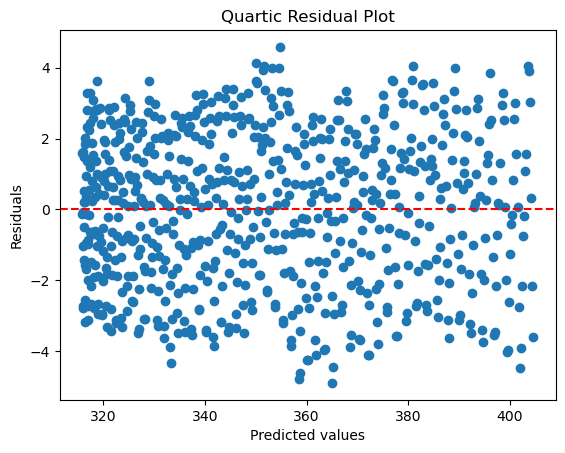

In [215]:
plt.scatter(y_pred4, residuals4)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Quartic Residual Plot")
plt.savefig("Quartic Residual Plot")
plt.show()

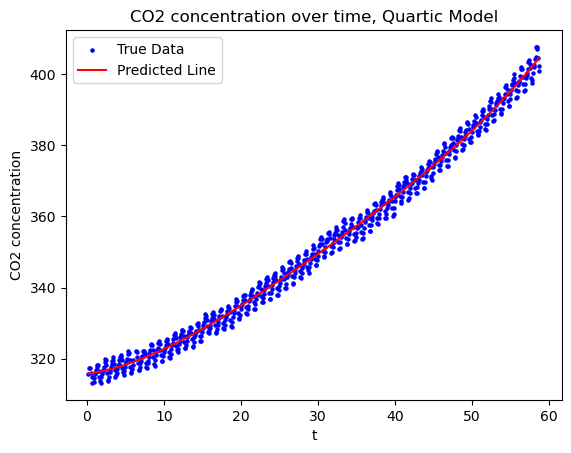

In [247]:
plt.scatter(x1, y, color='blue', label='True Data', s=5)

# Plot predicted values (regression line)
plt.plot(x1, y_pred4, color='red', label='Predicted Line')

# Labels and title
plt.xlabel('t')
plt.ylabel('CO2 concentration')
plt.title('CO2 concentration over time, Quartic Model')
plt.savefig("Quartic Plot")
plt.legend()
plt.show()

### Part (d)

In [217]:
array_with_residuals = np.hstack((filtered_array, y-y_pred2))

unique_values = np.unique(array_with_residuals[:, 2])
means = np.array([np.mean(array_with_residuals[array_with_residuals[:, 2] == val, -1]) for val in unique_values])

print(means)


[ 0.0160134   0.66876864  1.37153888  2.60854931  3.05357027  2.34584859
  0.75704975 -1.36960688 -3.15542041 -3.33819915 -2.08120658 -0.91061312]


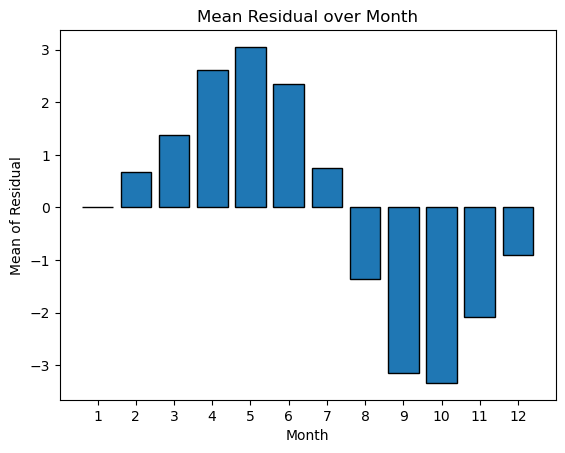

In [218]:
plt.bar(range(1, len(means)+1), means, edgecolor='black')

# Labeling the graph
plt.xlabel('Month')
plt.ylabel('Mean of Residual')
plt.title('Mean Residual over Month')

plt.xticks(range(1, 13))
plt.savefig("Monthly Avg Residual")

plt.show()

In [241]:
P = (-0.003+2.273*np.sin(np.pi * filtered_array[:, 2]/6)-1.717*np.cos(np.pi * filtered_array[:, 2]/6)).reshape(-1,1)

adj_residuals = y-(y_pred2+P)

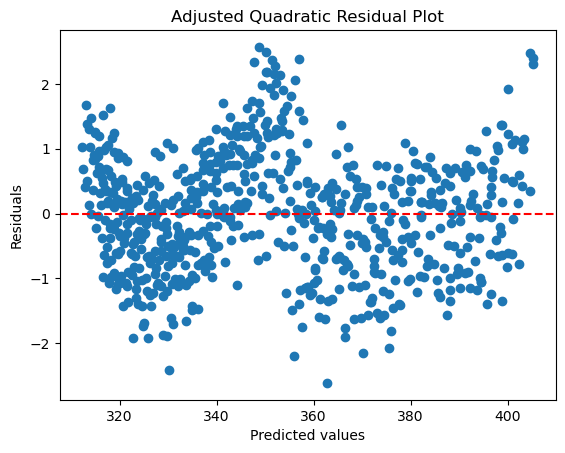

In [240]:
plt.scatter(y_pred2+P, adj_residuals)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Adjusted Quadratic Residual Plot")
plt.savefig("Adjusted Quadratic Residual Plot")
plt.show()

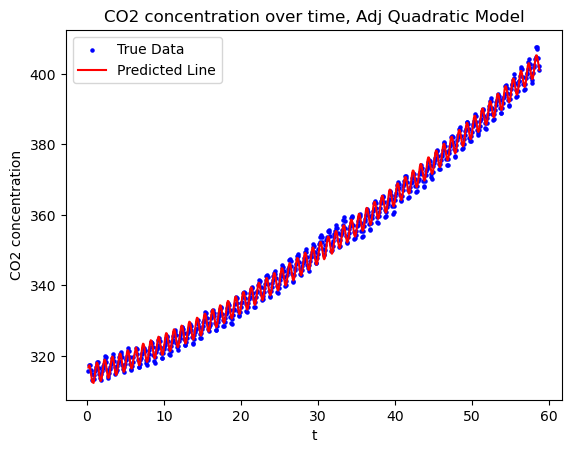

In [248]:
plt.scatter(x1, y, color='blue', label='True Data', s=5)

# Plot predicted values (regression line)
plt.plot(x1, y_pred2+P, color='red', label='Predicted Line')

# Labels and title
plt.xlabel('t')
plt.ylabel('CO2 concentration')
plt.title('CO2 concentration over time, Adj Quadratic Model')
plt.savefig("Adj quadratic Plot")
plt.legend()
plt.show()